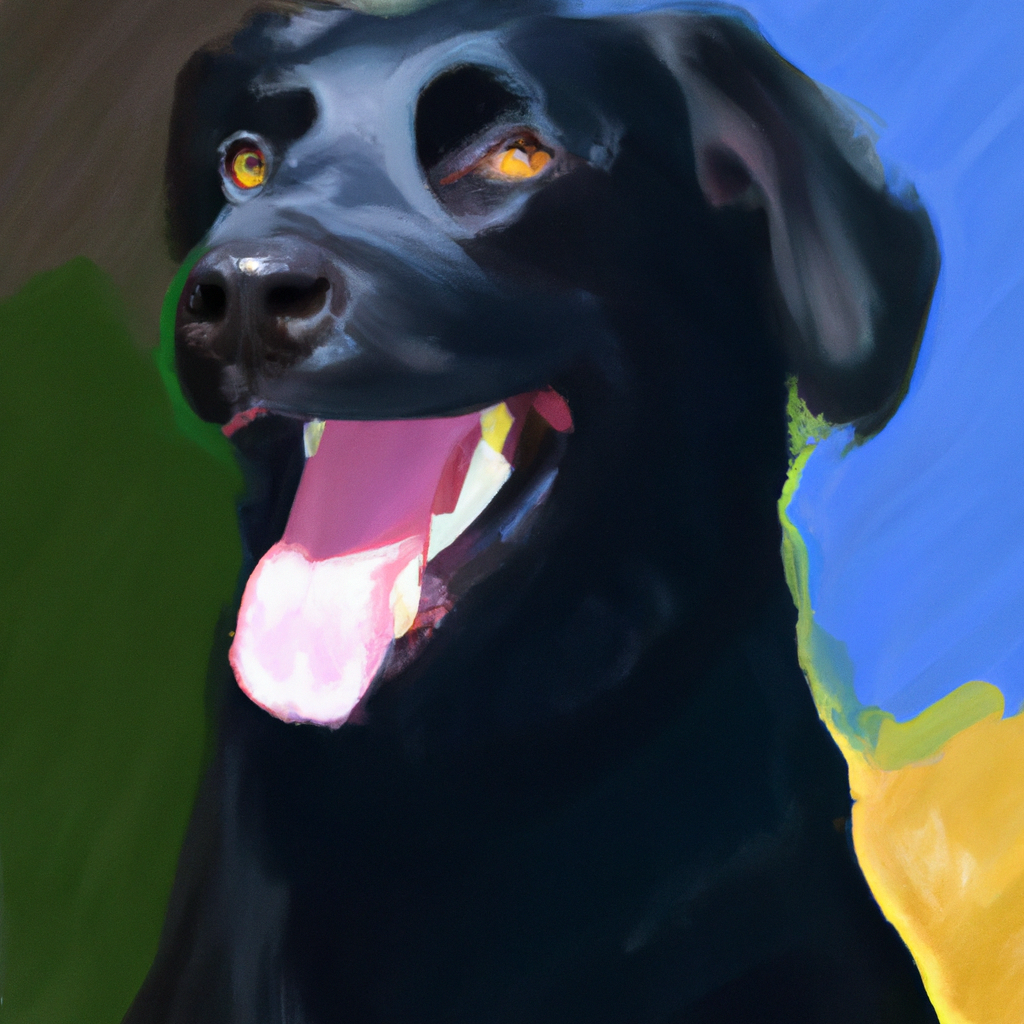

In [2]:
import openai
import os
import requests
from PIL import Image

# Get endpoint and key from environment variables
openai.api_base = "OPENAI ENDPOINT"
openai.api_key = "KEY"   

# Assign the API version (DALL-E is currently supported for the 2023-06-01-preview API version only)
openai.api_version = '2023-06-01-preview'
openai.api_type = 'azure'

# Create an image by using the image generation API
generation_response = openai.Image.create(
    prompt='A painting of a dog',    # Enter your prompt text here
    size='1024x1024',
    n=2
)

# Set the directory for the stored image
image_dir = os.path.join(os.curdir, 'images')

# If the directory doesn't exist, create it
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

# Initialize the image path (note the filetype should be png)
image_path = os.path.join(image_dir, 'generated_image.png')

# Retrieve the generated image
image_url = generation_response["data"][0]["url"]  # extract image URL from response
generated_image = requests.get(image_url).content  # download the image
with open(image_path, "wb") as image_file:
    image_file.write(generated_image)

# Display the image in the default image viewer
image = Image.open(image_path)
#image.show()
# Display the image
display(image)
